Taller 4 Curso: Fundamentos de Programación

* Docente: Daniel Escobar
* Estudiante: Danilo Rodriguez
* Tema: Exploratory Data Analysis (EDA)


Tomado de: https://www.kaggle.com/datasets/joebeachcapital/top-2000-companies-globally?resource=download

Descripción: "Clasificación mundial de las 2000 empresas más grandes del mundo según ingresos, ganancias, activos y valor de mercado, a partir de 2020. También incluye país, continente y coordenadas de latitud y longitud."

Pregunta de estudio: ¿Qué factores geográficos (país y  continente) influyen en el éxito económico de las empresas más grandes?

Objetivo de estudio: Examinar si existe alguna correlación entre la ubicación geográfica y los ingresos o beneficios.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [72]:
file_path = 'Top2000CompaniesGlobally.csv'
df = pd.read_csv(file_path)

print("Primeras filas del dataset:\n", data.head())

Primeras filas del dataset:
    Global Rank                  Company  Sales ($billion)  Profits ($billion)  \
0            1                     ICBC             134.8                37.8   
1            2  China Construction Bank             113.1                30.6   
2            3           JPMorgan Chase             108.2                21.3   
3            4         General Electric             147.4                13.6   
4            5              Exxon Mobil             420.7                44.9   

   Assets ($billion)  Market Value ($billion) Country      Continent  \
0             2813.5                    237.3   China           Asia   
1             2241.0                    202.0   China           Asia   
2             2359.1                    191.4     USA  North America   
3              685.3                    243.7     USA  North America   
4              333.8                    400.4     USA  North America   

   Latitude   Longitude  
0  35.86166  104.195397  

In [73]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank              1924 non-null   int64  
 1   Company                  1924 non-null   object 
 2   Sales ($billion)         1924 non-null   float64
 3   Profits ($billion)       1924 non-null   float64
 4   Assets ($billion)        1924 non-null   float64
 5   Market Value ($billion)  1924 non-null   float64
 6   Country                  1924 non-null   object 
 7   Continent                1924 non-null   object 
 8   Latitude                 1924 non-null   float64
 9   Longitude                1924 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 150.4+ KB


In [74]:
# Limpieza de datos 
df_clean = df.dropna()

df_clean['Log_Sales'] = np.log(df_clean['Sales ($billion)'])
df_clean['Log_Profits'] = np.log(df_clean['Profits ($billion)'])
df_clean['Log_Assets'] = np.log(df_clean['Assets ($billion)'])
df_clean['Log_Market_Value'] = np.log(df_clean['Market Value ($billion)'])


c:\Users\DaniloRodriguezArang\anaconda3\envs\udea\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

c:\Users\DaniloRodriguezArang\anaconda3\envs\udea\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

c:\Users\DaniloRodriguezArang\anaconda3\envs\udea\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log

c:\Users\DaniloRodriguezArang\anaconda3\envs\udea\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



In [75]:
# Estadísticas descriptivas de las variables numéricas
numeric_columns = ['Sales ($billion)', 'Profits ($billion)', 'Assets ($billion)', 'Market Value ($billion)', 'Log_Sales', 'Log_Profits', 'Log_Assets', 'Log_Market_Value']
numeric_stats = df_clean[numeric_columns].describe()

print("Estadísticas Descriptivas para Variables Numéricas:")
print(numeric_stats)


Estadísticas Descriptivas para Variables Numéricas:
       Sales ($billion)  Profits ($billion)  Assets ($billion)  \
count       1924.000000         1924.000000        1924.000000   
mean          19.265904            1.226040          79.507796   
std           34.683911            3.413831         261.098775   
min            0.000000          -24.500000           1.000000   
25%            4.100000            0.300000           9.675000   
50%            9.000000            0.600000          19.250000   
75%           18.425000            1.200000          45.800000   
max          469.200000           44.900000        3226.200000   

       Market Value ($billion)    Log_Sales  Log_Profits   Log_Assets  \
count              1924.000000  1924.000000  1771.000000  1924.000000   
mean                 19.558160         -inf         -inf     3.146102   
std                  32.957023          NaN          NaN     1.313346   
min                   0.000000         -inf         -inf     

Las ventas, con un valor medio de 19.27 mil millones de dólares y una gran desviación estándar de 34.68 mil millones, muestran una dispersión considerable, lo que sugiere que algunas empresas tienen ventas significativamente mayores que otras. Las ganancias promedio son bajas, con una media de 1.23 mil millones, pero hay una variabilidad notable (desviación estándar de 3.41 mil millones), y algunos valores negativos en las ganancias indican pérdidas en ciertas compañías. Los activos muestran una media de 79.51 mil millones, con una desviación estándar de 261.10 mil millones, lo que refleja una gran heterogeneidad en el tamaño de los activos de las empresas, con algunas alcanzando cifras extremadamente altas. En cuanto al valor de mercado, la media es de 19.56 mil millones, con una desviación estándar de 32.96 mil millones, lo que refleja un rango amplio en la valorización de las empresas en la muestra.

In [76]:
# Estadísticas para las variables categóricas (Country, Continent)
categorical_stats = {
    'Country': df_clean['Country'].value_counts(),
    'Continent': df_clean['Continent'].value_counts()
}

print("\nEstadísticas Categóricas para Países (Country) y Continentes (Continent):")
print(categorical_stats['Country'])



Estadísticas Categóricas para Países (Country) y Continentes (Continent):
Country
USA                     535
Japan                   246
China                   135
UK                       97
Canada                   65
South Korea              64
France                   64
India                    56
Germany                  50
Hong Kong                46
Australia                42
Taiwan                   40
Brazil                   31
Russia                   30
Italy                    29
Spain                    28
Sweden                   26
The Netherlands          24
Singapore                20
Malaysia                 20
South Africa             19
Mexico                   19
Saudi Arabia             17
Ireland                  17
Thailand                 16
Turkey                   14
United Arab Emirates     14
Finland                  12
Belgium                  11
Norway                   10
Denmark                  10
Israel                   10
Greece               

In [77]:
print(categorical_stats['Continent'])

Continent
Asia             719
North America    629
Europe           459
South America     49
Oceania           43
Africa            25
Name: count, dtype: int64


Estados Unidos lidera con 535 observaciones, seguido de Japón (246) y China (135), mientras que otros países como el Reino Unido, Canadá y Corea del Sur también tienen representaciones destacadas. Sin embargo, países de menor escala, como Pakistán, Vietnam y varios de África, tienen una representación mínima, con solo una observación en algunos casos. En cuanto a los continentes, Asia predomina con 719 observaciones, seguida de América del Norte con 629 y Europa con 459, lo que resalta la fuerte presencia de estas regiones en el conjunto de datos. Por otro lado, Sudamérica, Oceanía y África tienen representaciones mucho más reducidas, con 49, 43 y 25 observaciones respectivamente, lo que indica una notable concentración de datos en mercados más desarrollados y una escasa representación de economías emergentes o de menor escala.

C:\Users\DaniloRodriguezArang\AppData\Local\Temp\ipykernel_8640\3805131633.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




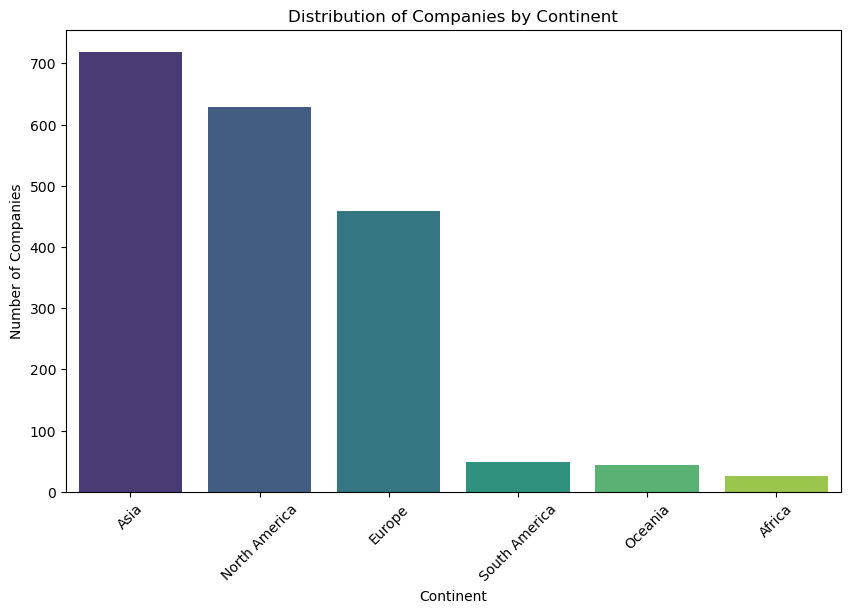

In [78]:
# Distribución de empresas por continente
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df_clean, palette='viridis')
plt.title('Distribution of Companies by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

C:\Users\DaniloRodriguezArang\AppData\Local\Temp\ipykernel_8640\1555860077.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




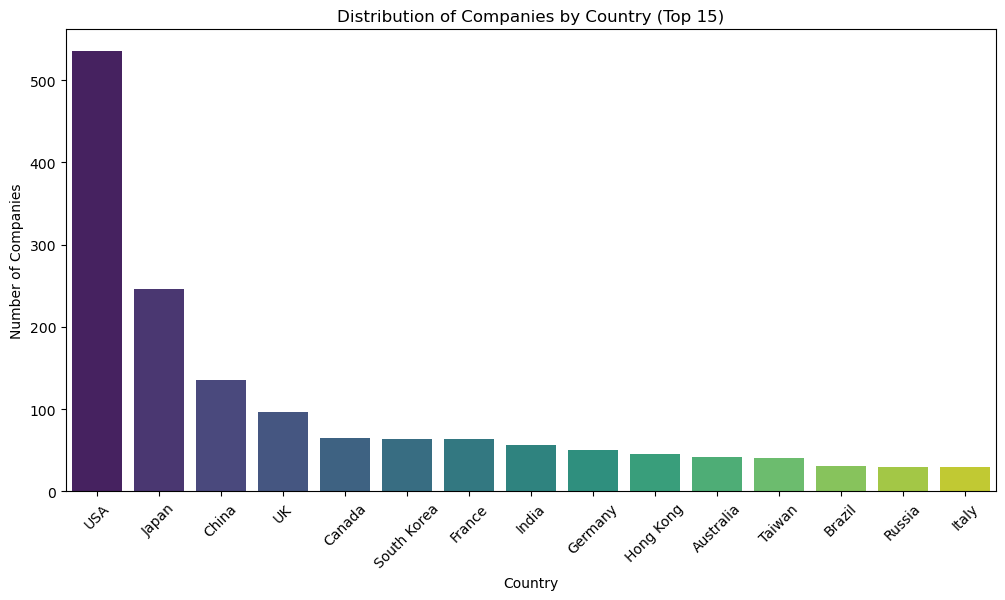

In [79]:
# Distribución de empresas por país
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df_clean, order=df_clean['Country'].value_counts().index[:15], palette='viridis')
plt.title('Distribution of Companies by Country (Top 15)')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

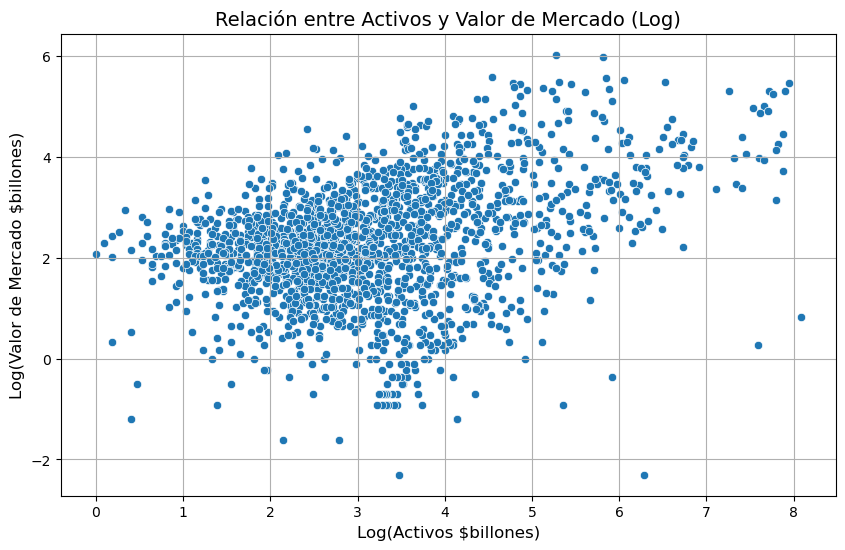

In [80]:
# Activos y valor de Mercado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Log_Assets', y='Log_Market_Value')
plt.title('Relación entre Activos y Valor de Mercado (Log)', fontsize=14)
plt.xlabel('Log(Activos $billones)', fontsize=12)
plt.ylabel('Log(Valor de Mercado $billones)', fontsize=12)
plt.grid(True)
plt.show()

Se observa una tendencia general positiva, lo que indica que a medida que aumentan los activos, también lo hace el valor de mercado, aunque con algunas variaciones. La dispersión de los puntos refleja una correlación moderada, pero no perfecta, entre ambas variables.

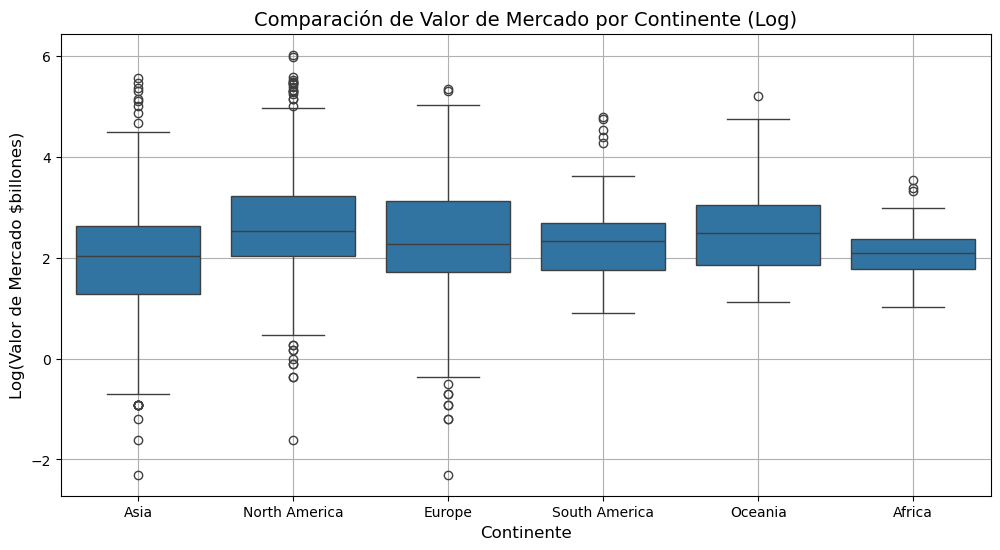

In [81]:
# Comparación de valor de mercado por continente
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Continent', y='Log_Market_Value')
plt.title('Comparación de Valor de Mercado por Continente (Log)', fontsize=14)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Log(Valor de Mercado $billones)', fontsize=12)
plt.grid(True)
plt.show()

Se observa que Asia y América del Norte tienen los valores más altos, con una distribución más concentrada en torno a la mediana. Europa sigue en valor, mientras que América del Sur, Oceanía y África muestran una mayor dispersión y valores más bajos, con algunos puntos atípicos elevados, especialmente en África. El rango de valores para cada continente varía, siendo Asia el más consistente y África el que presenta mayor variabilidad en los valores extremos.

In [82]:
# Ubicación de empresas
fig = px.scatter_geo(df_clean,
                     lat='Latitude', 
                     lon='Longitude', 
                     color='Company',  
                     hover_name='Company',
                     title='Ubicación de empresas',
                     projection="natural earth")

fig.show()

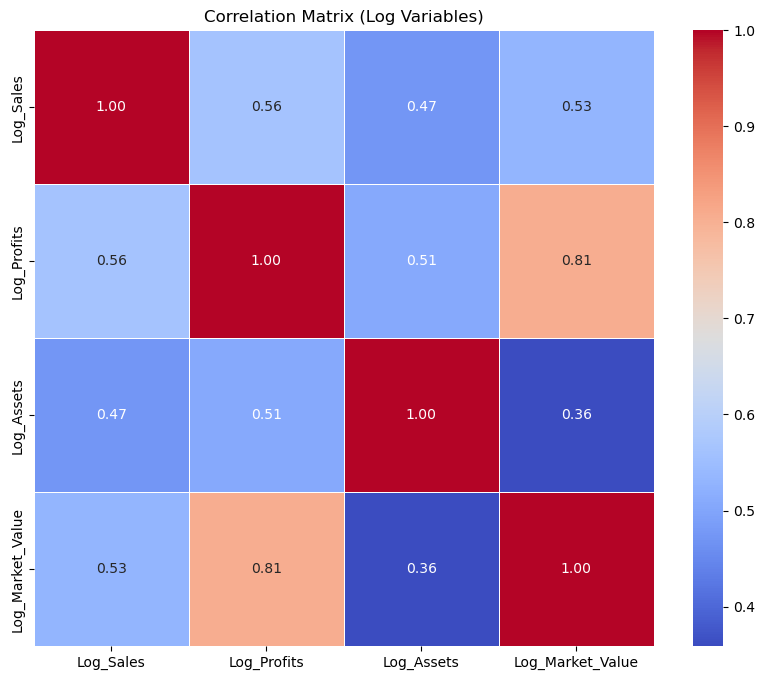

In [83]:
# Correlación
log_columns = ['Log_Sales', 'Log_Profits', 'Log_Assets', 'Log_Market_Value']

correlation_matrix_log = df_clean[log_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Log Variables)')
plt.show()

Se observa que la variable de Ganancias (Profit) tiene la correlación más fuerte con la variable de Valor de mercado (Market_Value) (0.81), lo que indica que las ganancias logarítmicas están fuertemente relacionadas con el valor de mercado logarítmico. Además, Log_Sales y Log_Profits tienen una correlación moderada de 0.56, lo que sugiere que las ventas también están relacionadas con las ganancias, aunque no tan estrechamente. Las correlaciones más bajas se encuentran entre Log_Assets y Log_Market_Value (0.36), indicando una relación más débil entre los activos logarítmicos y el valor de mercado.

In [84]:
# Promedio de ventas e ingresos por continente
avg_by_continent = df_clean.groupby('Continent')[['Sales ($billion)', 'Profits ($billion)', 'Assets ($billion)', 'Market Value ($billion)']].mean()

print("Promedio de variables por continente:")
print(avg_by_continent)

Promedio de variables por continente:
               Sales ($billion)  Profits ($billion)  Assets ($billion)  \
Continent                                                                
Africa                 7.068000            0.824000          25.240000   
Asia                  16.114743            1.009040          66.225174   
Europe                25.106972            1.129847         121.665577   
North America         19.571860            1.532591          66.569634   
Oceania               14.927907            1.593023          93.641860   
South America         16.891837            1.259184          60.871429   

               Market Value ($billion)  
Continent                               
Africa                       11.064000  
Asia                         13.368846  
Europe                       20.032680  
North America                26.215580  
Oceania                      25.858140  
South America                19.277551  


Los promedios por continente de las variables financieras muestran que Europa tiene los valores más altos en Ventas, Activos y Valor de Mercado, con 25.11, 121.67 y 20.03 billones de dólares respectivamente. Le sigue Norteamérica, que destaca por sus Beneficios más altos, con 1.53 billones de dólares, y también tiene un elevado Valor de Mercado de 26.22 billones. Oceanía presenta un promedio alto en Beneficios con 1.59 billones de dólares, aunque sus Ventas y Activos son inferiores a los de Europa y Norteamérica. Asia se destaca por sus elevados Activos (66.23 billones) y una fuerte relación en Ventas (16.11 billones), mientras que América del Sur muestra cifras intermedias, con un buen nivel de Ventas y Beneficios de 16.89 y 1.26 billones, respectivamente. Por último, África tiene los valores más bajos en todas las variables, destacándose solo con 7.07 billones en Ventas y 11.06 billones en Valor de Mercado.

In [85]:
# Promedio de ventas y beneficios por país
avg_by_country = df_clean.groupby('Country')[['Sales ($billion)', 'Profits ($billion)', 'Assets ($billion)', 'Market Value ($billion)']].mean()

print("Promedio de variables económicas por país:")
print(avg_by_country)

Promedio de variables económicas por país:
                      Sales ($billion)  Profits ($billion)  Assets ($billion)  \
Country                                                                         
Australia                    15.200000            1.609524          95.802381   
Belgium                      17.845455           -0.281818         123.681818   
Bermuda                      10.911111            0.600000          18.600000   
Brazil                       21.922581            1.448387          79.654839   
Canada                       12.761538            1.127692          88.358462   
Channel Islands               1.300000            0.400000           3.100000   
Chile                         8.800000            0.377778          22.722222   
China                        22.403704            2.040000         127.399259   
Colombia                      9.983333            1.816667          38.366667   
Czech Republic               11.300000            2.200000        

De forma general, se llegan a las mismas conclusiones del apartado anterior. Sin embargo, de forma más específica, Francia se destaca con los valores más altos en Activos (182.05 billones de dólares) y Ventas (34.15 billones), seguido por Alemania con 152.73 billones de dólares en activos y 41.70 billones en ventas. Reino Unido y EE. UU. también muestran grandes cifras, especialmente en Valor de Mercado, con 23.99 billones y 27.65 billones respectivamente.

Por otro lado, países como Liberia, Vietnam y Egipto presentan valores significativamente menores en todas las variables económicas, con Ventas que rondan entre 1.5 y 7.7 billones de dólares, y Valor de Mercado de entre 2.05 y 7.4 billones. Además, China y Brasil sobresalen por su gran tamaño en Ventas (22.4 y 21.92 billones, respectivamente), aunque sus Beneficios no alcanzan los mismos niveles elevados que en países más desarrollados como Rusia (con 3.92 billones en beneficios). 

In [ ]:
# Test de diferencia en medias 
variables = ['Sales ($billion)', 'Profits ($billion)', 'Assets ($billion)', 'Market Value ($billion)']

# test ANOVA
for var in variables:
    print(f"Test de diferencia en medias para {var}:")
    # ANOVA por continente
    f_stat, p_value = stats.f_oneway(
        *[df_clean[df_clean['Continent'] == continente][var] for continente in df_clean['Continent'].unique()]
    )
    
    print(f"Estadístico F: {f_stat:.3f}, p-valor: {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"Existe diferencia significativa en las medias de {var} entre los continentes.")
    else:
        print(f"No existe diferencia significativa en las medias de {var} entre los continentes.")
    print("-" * 50)

Test de diferencia en medias para Sales ($billion):
Estadístico F: 4.643, p-valor: 0.000
Existe diferencia significativa en las medias de Sales ($billion) entre los continentes.
--------------------------------------------------
Test de diferencia en medias para Profits ($billion):
Estadístico F: 1.842, p-valor: 0.102
No existe diferencia significativa en las medias de Profits ($billion) entre los continentes.
--------------------------------------------------
Test de diferencia en medias para Assets ($billion):
Estadístico F: 3.386, p-valor: 0.005
Existe diferencia significativa en las medias de Assets ($billion) entre los continentes.
--------------------------------------------------
Test de diferencia en medias para Market Value ($billion):
Estadístico F: 11.158, p-valor: 0.000
Existe diferencia significativa en las medias de Market Value ($billion) entre los continentes.
--------------------------------------------------


Los resultados del test ANOVA indican que existen diferencias significativas en las medias de Ventas, Valor de mercado y Activos entre los continentes, ya que en todos estos casos el valor p es menor que 0.05. Sin embargo, no se observa una diferencia significativa en las medias de Ganancia entre los continentes, ya que el valor p es 0.102, lo que sugiere que las medias no varían de manera significativa entre los continentes en este caso.

Conclusión del estudio. Teniendo en cuenta a pregunta y objetivo propuesto podemos decir que si bien el estudio es limitado y de corto alcance, según los datos y analisis estadisticos propuestos, podemos concluir que efectivamente hay una relación entre los factores geográficos (país y continente) y el éxito económico de las empresas más grandes del mundo. Al analizar las ubicaciones, se observa que las empresas de países como Estados Unidos, Japón y China  dominan los rankings de ventas y beneficios, lo que sugiere que las economías de estos países tienen un impacto positivo en el desempeño económico de sus empresas. Además, las empresas ubicadas en continentes como Asia y América del Norte parecen tener una mayor proporción de ingresos y activos comparados con aquellas de continentes como Europa o África. Esto refleja la influencia de factores geográficos como el tamaño del mercado, el acceso a recursos y la infraestructura económica de cada región.

En términos de correlación, la ubicación geográfica no es solo un factor incidental, sino que está estrechamente vinculada con el acceso a mercados globales y las oportunidades económicas. Las empresas situadas en continentes con economías avanzadas, como América del Norte y Asia, disfrutan de mayores ingresos y activos, lo que se traduce en un éxito económico superior. Por lo cual, se evidencia que hay una alta concentración de estas empresas donde el 45,8% de las 2000 empresas más grandes en el mundo se ubican en 3 paises (Estados Unidos, Japón y China).

Un limitante muy grande de la base de datos fue que no desagregaba la compañía por tipo/sector lo que mimitó en gran medida el estudio.